# Cloud Botany data access: browse, and download a set

For more about the dataset, see tte Jansson et al. [paper](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2023MS003796). Also find .ipynb notebook templates and [instructions](https://howto.eurec4a.eu/botany_dales.html). From these reosurces, I downloaded mean profiles, and time-slice 2D fields of TWP LWP and precipitation. Those downloaded subsamples are analyzed in the other notebook in this directory, whose figures appear in the paper. In the profiles, 'wthvt','w2r' are the w - theta-v covariance (buoyancy flux with some unit conversions) and w variance for a quick vertical KE (VKE) budget residence time. 

Environment: `mamba create -n evo-conv python=3.11 xarray jupyterlab netcdf4`
Then from within that environment, `pip install intake xarray intake-xarray zarr pydap s3fs requests ipfsspec`. Oops forgot, `mamba install matplotlib`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
import xarray as xr

In [3]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/eurec4a/eurec4a-intake/master/catalog.yml")

In [4]:
list(cat)

['radiosondes',
 'barbados',
 'Atalante',
 'ATR',
 'BOREAL',
 'CU-RAAVEN',
 'Caravela',
 'HALO',
 'Humpback',
 'IFM03',
 'IFM09',
 'IFM12',
 'Kracken',
 'Melonhead',
 'mini-MPCK',
 'MPCK-plus',
 'MS-Merian',
 'NTAS',
 'Omura',
 'P3',
 'QuadCopter',
 'RonBrown',
 'SD-1026',
 'SD-1060',
 'SD-1061',
 'SD-1063',
 'SD-1064',
 'Skywalker07',
 'Skywalker10',
 'Skywalker12',
 'SVP-B-4101696',
 'SVP-B-4101697',
 'SVP-B-4101698',
 'SVP-B-4101699',
 'SVP-B-4101780',
 'SVP-BRST-4402505',
 'SVP-BRST-4402506',
 'SVP-BRST-4402507',
 'SVP-BRST-4402508',
 'SVP-BRST-6203717',
 'SVP-BS-4101757',
 'SVP-BS-4101758',
 'SVP-BSW-3101569',
 'SVP-BSW-3101570',
 'SVP-BSW-3101571',
 'SVP-BSW-3101572',
 'SVP-BSW-3101573',
 'SVP-BSW-3101574',
 'SVP-BSW-3101575',
 'SVP-BSW-3101576',
 'SVP-BSW-3101577',
 'SVP-BSW-3101578',
 'SWIFT16',
 'SWIFT17',
 'SWIFT22',
 'SWIFT23',
 'SWIFT24',
 'SWIFT25',
 'TO',
 'WG245',
 'WG247',
 'c3ontext',
 'dropsondes',
 'satellites',
 'simulations',
 'radiative_profiles',
 'Meteor']

In [4]:
# Satellite data from EUREC4A: some other project to look at that ONE MINUTE RES!
# sat = cat.satellites.GOES16.latlongrid.to_dask()
# sat.isel(time=100).plot()     # lat: 2640 lon: 2200 time: 1440 = 1 minute resolution!!

In [5]:
botany_cat = cat.simulations.DALES.botany

In [6]:
botany_cat.dx100m.nx1536

nx1536:
  args:
    path: https://raw.githubusercontent.com/eurec4a/eurec4a-intake/master/Simulations/DALES/botany_dx100m_nx1536.yaml
  description: 'Cloud botany: DALES LES ensemble with varied forcings at 100m grid
    spacing, 153.6 km domain'
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    catalog_dir: https://raw.githubusercontent.com/eurec4a/eurec4a-intake/master/Simulations/DALES


In [7]:
list(botany_cat.dx100m.nx1536)

['profiles', 'timeseries', '2D', '3D', 'cross_xy', 'radiation', 'parameters']

In [ ]:
import pandas as pd
varied_parameters = ['member','thls', 'u0', 'qt0', 'qt_lambda', 'thl_Gamma', 'wpamp', 'dudz', 'location']
parameters = cat.simulations.DALES.botany.dx100m.nx1536.parameters.read() # json error?
df_parameters = pd.DataFrame.from_records(parameters)[varied_parameters]
df_parameters

In [8]:
df_parameters.iloc[ [2,9,32,33,34,35,36] ]

,member,thls,u0,qt0,qt_lambda,thl_Gamma,wpamp,dudz,location
2,3,297.5,-15.0,0.0135,1200.0,4.5,0.0018,0.0022,corner
9,10,297.5,-15.0,0.0150,1200.0,4.5,-0.0035,0.0022,corner
32,33,297.5,-5.0,0.0150,2500.0,5.5,0.0018,0.0022,corner
33,34,299.5,-15.0,0.0135,1200.0,4.5,-0.0035,0.0022,corner
34,35,299.5,-15.0,0.0135,1200.0,4.5,0.0018,0.0022,corner
35,36,299.5,-15.0,0.0135,1200.0,5.5,-0.0035,0.0022,corner
36,37,299.5,-15.0,0.0135,1200.0,5.5,0.0018,0.0022,corner


In [37]:
import xarray as xr

ds_profiles = botany_cat.dx100m.nx1536['profiles'].to_dask()
# Add u0 to the profiles output
# ds_u = ds_profiles.assign(df_parameters[['member','u0']].set_index('member').to_xarray())

ds_profiles

<xarray.Dataset>
Dimensions:    (member: 103, time: 720, zt: 175, zm: 175)
Coordinates:
  * member     (member) int32 1 2 3 4 5 6 7 8 9 ... 96 97 98 99 100 101 102 103
  * time       (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * zm         (zm) float32 0.0 15.0 30.0 45.3 ... 6.772e+03 6.854e+03 6.938e+03
  * zt         (zt) float32 7.5 22.5 37.65 ... 6.813e+03 6.896e+03 6.98e+03
Data variables: (12/102)
    cfrac      (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    cs         (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    dvrmn      (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    lwd        (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    lwdca      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    lwu        (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    ...         ...
    wthlr      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthls      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthlt      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthvr      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthvs      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthvt      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
Attributes:
    Author:   
    Source:   DALES 4.2 git: v4.3-108-gca69cb
    history:  Created on 20220520 at 213340.423
    title:    profiles.001.nc

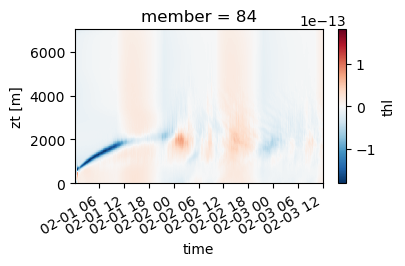

In [41]:
ds_profiles.thl[83].differentiate('time').transpose().plot(size=2,aspect=2);   # thl

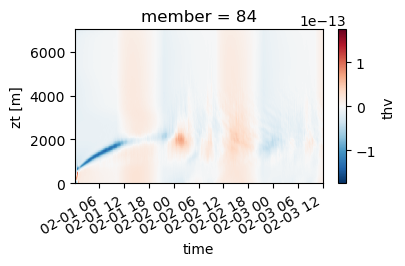

In [42]:
ds_profiles.thv[83].differentiate('time').transpose().plot(size=2,aspect=2);   # thv

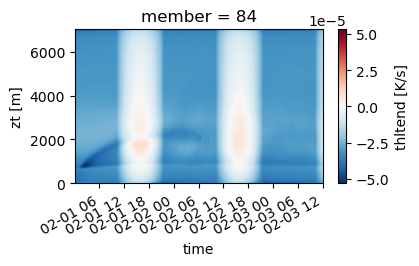

In [33]:
ds_profiles.thltend[83].transpose().plot(size=2,aspect=2); # time dependent radiative heating 

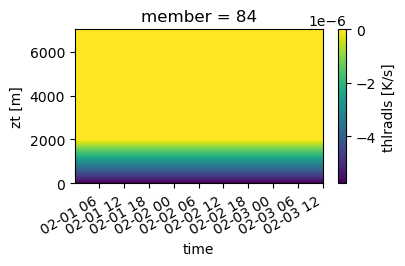

In [34]:
ds_profiles.thlradls[83].transpose().plot(size=2,aspect=2); # "large scale" ? radiative heating 

In [30]:
mydata = ds_profiles[['wthvt','ql','ql2r','cfrac','w2r','u2r','v2r','thv','rhof','skew','thltend']]
mydata.to_netcdf('/Users/bmapes/Box/EvolutionaryConvection/CloudBotany/CloudBotany_profiles_thermKE.nc')
mydata 

<xarray.Dataset>
Dimensions:  (member: 103, time: 720, zm: 175, zt: 175)
Coordinates:
  * member   (member) int32 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * zm       (zm) float32 0.0 15.0 30.0 45.3 ... 6.772e+03 6.854e+03 6.938e+03
  * zt       (zt) float32 7.5 22.5 37.65 52.95 ... 6.813e+03 6.896e+03 6.98e+03
Data variables:
    wthvt    (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    ql       (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    ql2r     (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    cfrac    (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    w2r      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    u2r      (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    v2r      (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    thv      (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    rhof     (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    skew     (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    thltend  (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
Attributes:
    Author:   
    Source:   DALES 4.2 git: v4.3-108-gca69cb
    history:  Created on 20220520 at 213340.423
    title:    profiles.001.nc

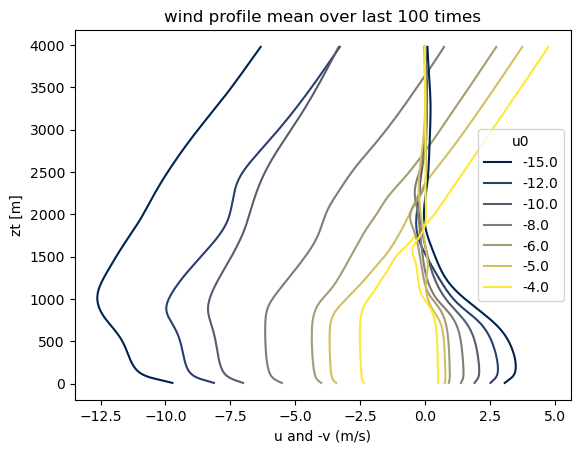

In [10]:
# Plot wind profiles 
# Examples from the HowTo https://howto.eurec4a.eu/botany_dales.html#
# depends on intake.json which isn't working for me 
# ds_u = ds_profiles.assign(df_parameters[['member','u0']].set_index('member').to_xarray())

from cycler import cycler

fig = plt.figure()
ax = plt.gca()
ax.set_prop_cycle(cycler(color=plt.cm.cividis(np.linspace(0, 1, 7))))

# Plot mean cloud fraction profiles grouped by surface wind over the last 100 time steps of all simulations
ds_u[['cfrac','u','v','u0']].isel(time=slice(-100,-1)).sel(zt = slice(0,4000)).mean(dim='time').\
       groupby('u0').mean()['u'].plot.line(ax=ax, y='zt')
(-ds_u[['cfrac','u','v','u0']].isel(time=slice(-100,-1)).sel(zt = slice(0,4000)).mean(dim='time').\
       groupby('u0').mean()['v']).plot.line(ax=ax, y='zt')
plt.xlabel('u and -v (m/s)')
plt.title('wind profile mean over last 100 times')
plt.show()

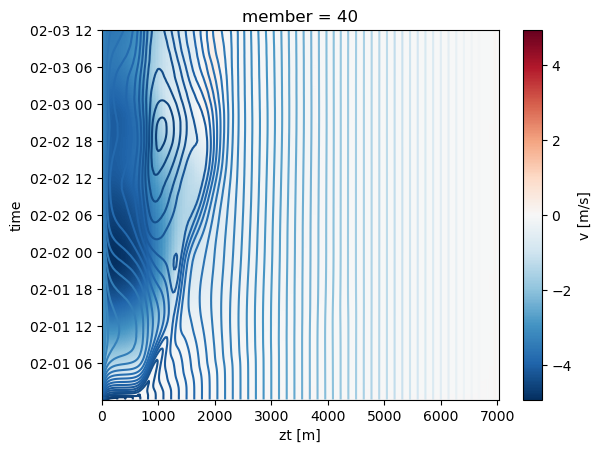

In [16]:
# Inertial oscillations

ds_u.v.sel(member=40).plot();
ds_u.u.sel(member=40).plot.contour(levels=100);

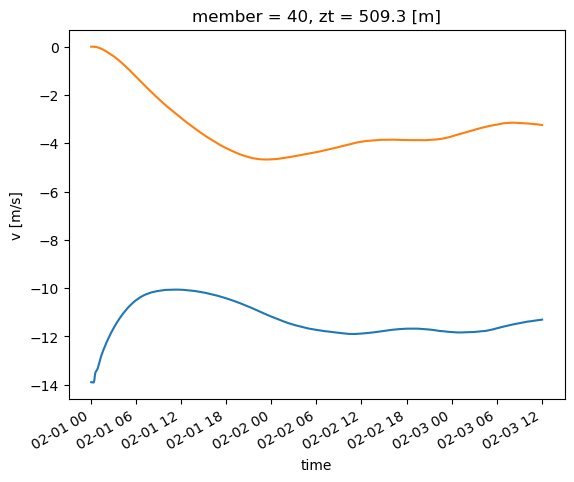

In [20]:
#wdir500 = 
ds_u.u.sel(member=40,zt=500, method='nearest').plot();
ds_u.v.sel(member=40,zt=500, method='nearest').plot();

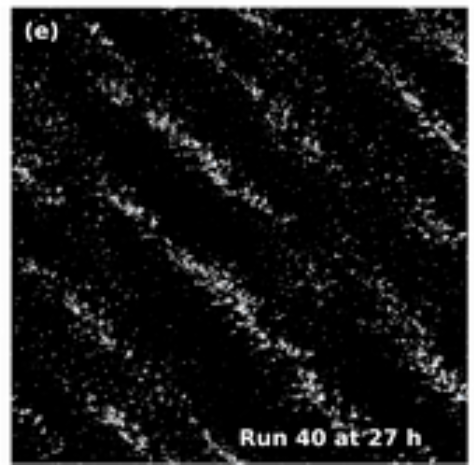

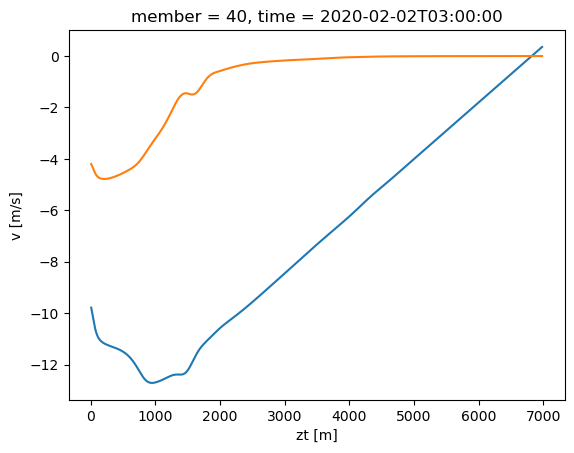

In [190]:
# Figure 8 in the paper has 45 degree cloud bands, why? 
# Shear profile is not at 45 or anything

ds_u.u.sel(time='2020-02-02T03:00', member=40).plot()
ds_u.v.sel(time='2020-02-02T03:00', member=40).plot();

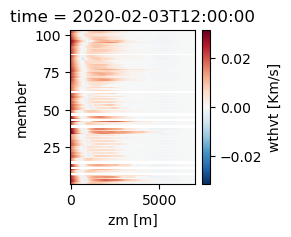

In [196]:
# Plot mean buoyancy flux profiles at last time step 
ds_u['wthvt'].isel(time=-1).plot(size=2, aspect=1)

-------------------
# 2D fields 

In [12]:
ds_2D = botany_cat.dx100m.nx1536['2D'].to_dask()
ds_2D

# check some problem cases 
# 1,9  31,11  34,8  47,8  61,3  69,4  74,7  81,4  83,4  86,4  91,5  
# Downloads have some missing squares since the wifi was unreliable during xarray .to_netcdf() method. 

<xarray.Dataset>
Dimensions:    (member: 103, time: 720, yt: 1536, xt: 1536)
Coordinates:
  * member     (member) int32 1 2 3 4 5 6 7 8 9 ... 96 97 98 99 100 101 102 103
  * time       (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * xt         (xt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
  * yt         (yt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
Data variables:
    capemax    (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    cinmax     (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    cldtop     (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    hinvsrf    (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    hmix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    lwp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    rwp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    surfprec   (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    thetavmix  (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    twp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    umix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    vmix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu May 26 04:40:08 2022: cdo -f nc4 -z zip_6 -r -O collgri...
    title:        000/cape.x000y000.001.nc

In [197]:
# Vertical mean bflux 
bfluxts = ds_u['wthvt'].mean(dim='zm')

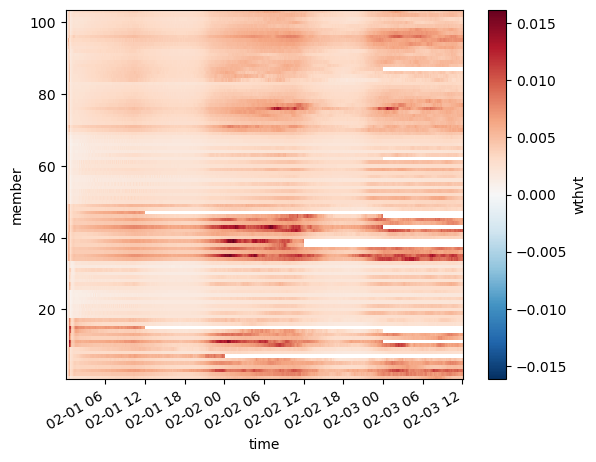

In [51]:
bfluxts.plot()

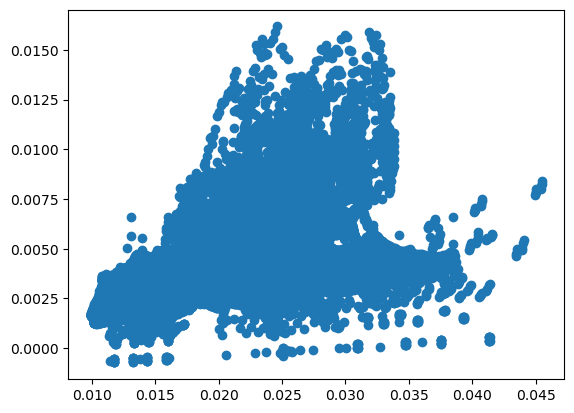

In [54]:
# Wonder if the surface value is a good proxy for the vertical mean? 
# Not necessarily, since buoyancy' is not really a conserved thing 
# depends on environment b' = g thv'/thv_env

plt.scatter( ds_u['wthvt'].isel(zm=1), bfluxts )

# 2D plots of cloud and rain patterns 

For the last time (60 hours after initialisation) for the “center” of the hypercube of simulation parameter space (member=1, the zeroth member), we could visualise the vertically integrated total specific humidity (the total water path twp), the cloud-top height (cldtop), the rain-water path (rwp) and an indicator for the extent of cold pools (the local mixed-layer height, hmix), as follows. 

To compute a suite of existing cloud scene morphometrics, one could follow [this repo](https://github.com/martinjanssens/cloudmetrics) although I have not done this

`import cloudmetrics`
`iorg = cloudmetrics.iorg(cloud_mask=da_cloudmask)`

In [184]:
ds2D = botany_cat.dx100m.nx1536['2D'].to_dask() #.sel(member=1).isel(time=-1)
ds2D

<xarray.Dataset>
Dimensions:    (member: 103, time: 720, yt: 1536, xt: 1536)
Coordinates:
  * member     (member) int32 1 2 3 4 5 6 7 8 9 ... 96 97 98 99 100 101 102 103
  * time       (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * xt         (xt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
  * yt         (yt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
Data variables:
    capemax    (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    cinmax     (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    cldtop     (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    hinvsrf    (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    hmix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    lwp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    rwp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    surfprec   (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    thetavmix  (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    twp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    umix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    vmix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu May 26 04:40:08 2022: cdo -f nc4 -z zip_6 -r -O collgri...
    title:        000/cape.x000y000.001.nc

In [193]:
# Get column integral liquid and total water paths (cloud) and surface precip rate. 
# Subset every 6th spatial pixel and every 40th time level 

mydata2d = ds2D[ ['lwp','surfprec','twp'] ].isel(time=slice(None, None, 40))\
                                    .isel(xt=slice(None, None, 6))\
                                    .isel(yt=slice(None, None, 6)) 
mydata2d

<xarray.Dataset>
Dimensions:   (member: 103, time: 18, yt: 256, xt: 256)
Coordinates:
  * member    (member) int32 1 2 3 4 5 6 7 8 9 ... 96 97 98 99 100 101 102 103
  * time      (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T08:45:00
  * xt        (xt) float64 50.0 650.0 1.25e+03 ... 1.518e+05 1.524e+05 1.530e+05
  * yt        (yt) float64 50.0 650.0 1.25e+03 ... 1.518e+05 1.524e+05 1.530e+05
Data variables:
    lwp       (member, time, yt, xt) float32 dask.array<chunksize=(1, 1, 43, 43), meta=np.ndarray>
    surfprec  (member, time, yt, xt) float32 dask.array<chunksize=(1, 1, 43, 43), meta=np.ndarray>
    twp       (member, time, yt, xt) float32 dask.array<chunksize=(1, 1, 43, 43), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu May 26 04:40:08 2022: cdo -f nc4 -z zip_6 -r -O collgri...
    title:        000/cape.x000y000.001.nc

In [ ]:
# DOWNLOAD AND WRITE 2D DATASET for offline work  
# exps: 103 time: 18  yt: 256  xt: 256    --> under 1GB

mydata2d.to_netcdf('/Users/bmapes/Box/EvolutionaryConvection/CloudBotany_patterns256_goodwifi.nc')

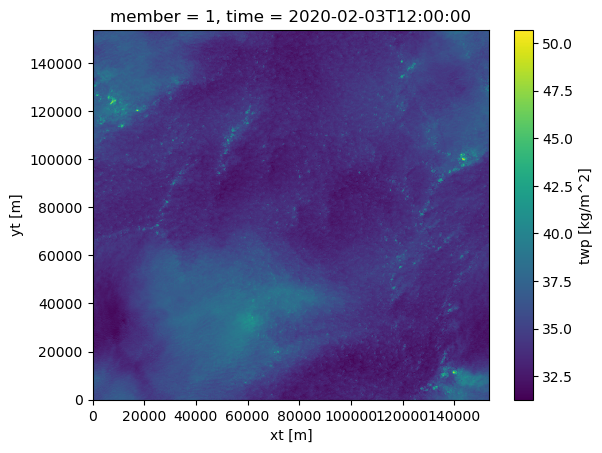

In [26]:
# Better view of LWP or TWP toward devising a cloud probability field 

ds_2D.twp.plot()

In [28]:
# Capture time series of basic stats: 103 members, 3600 times 

ds_ts = botany_cat.dx100m.nx1536['timeseries'].to_dask()
ds_ts

<xarray.Dataset>
Dimensions:  (member: 103, time: 3600)
Coordinates:
  * member   (member) int32 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 2020-02-01T00:01:00 ... 2020-02-03T12:00:00
Data variables: (12/22)
    cfrac    (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    lmax     (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    lwp_bar  (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    lwp_max  (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    obukh    (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    qtstr    (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    ...       ...
    wthetav  (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    z0       (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    zb       (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    zc_av    (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    zc_max   (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    zi       (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
Attributes:
    Author:   
    Source:   DALES 4.2 git: v4.3-108-gca69cb
    history:  Created on 20220520 at 213340.345
    title:    tmser.001.nc

Text(0.5, 1.0, 'Cumulation of surface theta-v flux: a version of age')

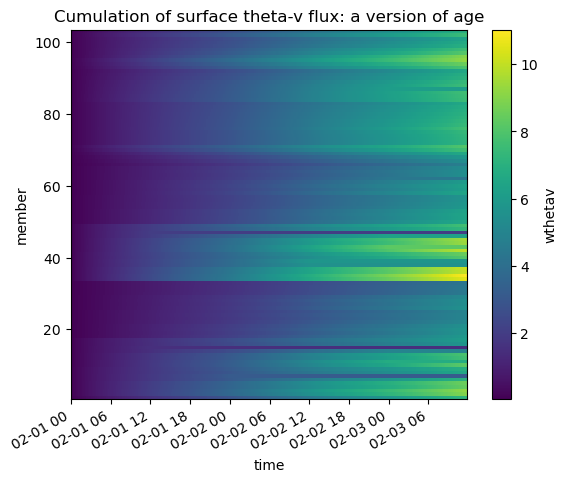

In [36]:
ds_ts.wthetav[:,::10].cumsum(axis=1).plot()
plt.title('Cumulation of surface theta-v flux: a version of age')

-------------------
# 3D fields 

In [ ]:
ds_3D = botany_cat.dx100m.nx1536['3D'].to_dask()

# For a spectral KE budget by scale ("configs" = wavenumbers): download some full 3D volumes: 
# Every 6th point in space, every 20th point in time, only up to 3km, only certain cases? 

sub3D = ds_3D[['u','v','w','thl']].isel(time=slice(None, None, 20))\
                                    .isel(xt=slice(None, None, 6))\
                                    .isel(yt=slice(None, None, 6))\
                                    .isel(xm=slice(None, None, 6))\
                                    .isel(ym=slice(None, None, 6))\ 
                                    .sel(zt=slice(0,3000))\    
                                    .sel(zm=slice(0,3000))\ 
                                    .isel(zt=slice(None, None, 6))\    
                                    .isel(zm=slice(None, None, 6))\ 
                                    .sel(member=[   ])


sub3D

In [ ]:
# Every 6th horizontal point (256x256), every 40th time 

sub3D = ds_3D[['uxy','vxy','wxy','thlxy']].isel(time=slice(None, None, 20))\
                                    .isel(xt=slice(None, None, 6))\
                                    .isel(yt=slice(None, None, 6))\
                                    .isel(xm=slice(None, None, 6))\
                                    .isel(ym=slice(None, None, 6)) 
sub3D

In [ ]:
sub3D.to_netcdf('/Users/bem/Box/EvolutionaryConvection/CloudBotany/uvwthl_4levels_256_36times.nc')

# 2D cross section (just a few levels) 

In [9]:
# Connect to 'cross section' (map) data at 4 specific heights 

ds_2Dx = botany_cat.dx100m.nx1536['cross_xy'].to_dask()
ds_2Dx

<xarray.Dataset> Size: 20TB
Dimensions:  (member: 103, zt: 4, time: 720, yt: 1536, xt: 1536, xm: 1536,
              ym: 1536)
Coordinates:
  * member   (member) int32 412B 1 2 3 4 5 6 7 8 ... 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 6kB 2020-02-01T00:05:00 ... 2020-02-03T12:...
  * xm       (xm) float64 12kB 0.0 100.0 200.0 ... 1.533e+05 1.534e+05 1.535e+05
  * xt       (xt) float64 12kB 50.0 150.0 250.0 ... 1.534e+05 1.536e+05
  * ym       (ym) float64 12kB 0.0 100.0 200.0 ... 1.533e+05 1.534e+05 1.535e+05
  * yt       (yt) float64 12kB 50.0 150.0 250.0 ... 1.534e+05 1.536e+05
  * zt       (zt) float32 16B 7.5 197.7 611.4 999.1
Data variables:
    qlxy     (zt, member, time, yt, xt) float32 3TB dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    qrxy     (zt, member, time, yt, xt) float32 3TB dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    qtxy     (zt, member, time, yt, xt) float32 3TB dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    thlxy    (zt, member, time, yt, xt) float32 3TB dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    uxy      (zt, member, time, yt, xm) float32 3TB dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    vxy      (zt, member, time, ym, xt) float32 3TB dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    wxy      (zt, member, time, yt, xt) float32 3TB dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu May 26 08:21:51 2022: cdo -f nc4 -z zip_6 -r -O collgri...
    title:        000/crossxy.0001.x000y000.001.nc

------------------

# Code to detect linear waves or cloud streets (Fourier analysis)

Not used in paper, but one could craft an information (nonuniformity-of-PDF) measure of this anisotropy, such as the azimuthal distribution of Fourier power at certain wavenumbers. That and precipitation and cumulative buoyancy flux could be 3 predictors of spatial field organization, for instance, or 3 ecological guilds interacting. Waves might be crucial in symmetry breaking, leading to cloud concentrations that might trigger precipitation, which then goes on to dominate the patterns? Future Work awaits, but pretty straightforward from these tools. 

In [27]:
ds2D = botany_cat.dx100m.nx1536['2D'].to_dask() #.sel(member=1).isel(time=-1)
ds2D

<xarray.Dataset>
Dimensions:    (member: 103, time: 720, yt: 1536, xt: 1536)
Coordinates:
  * member     (member) int32 1 2 3 4 5 6 7 8 9 ... 96 97 98 99 100 101 102 103
  * time       (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * xt         (xt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
  * yt         (yt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
Data variables:
    capemax    (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    cinmax     (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    cldtop     (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    hinvsrf    (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    hmix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    lwp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    rwp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    surfprec   (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    thetavmix  (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    twp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    umix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    vmix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu May 26 04:40:08 2022: cdo -f nc4 -z zip_6 -r -O collgri...
    title:        000/cape.x000y000.001.nc

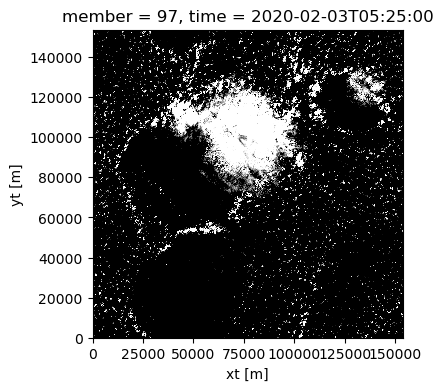

In [213]:
# Detect wave direction and amplitude, find an example where it is clear 
# like member=4, time=250    [3][250] 
# sqrt helps bring up small values, crushes dynamic range (as does radiative impact!) 

np.sqrt(ds2D.lwp[96][16*40]).plot(vmin=0, vmax=0.25, cmap='Greys_r', add_colorbar=False, size=4, aspect=1)

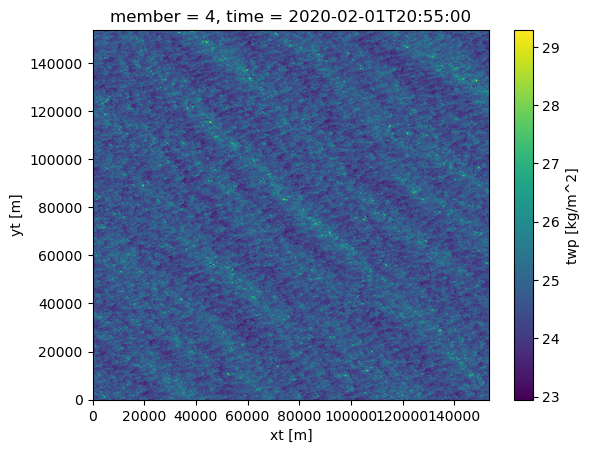

In [153]:
# total water path example with strong wave signature 
ds2D.twp[3][250].plot()

In [154]:
# TWP image: let's process one 

image = np.sqrt(ds2D.twp[3][250]) 
cloud_pattern = image.values

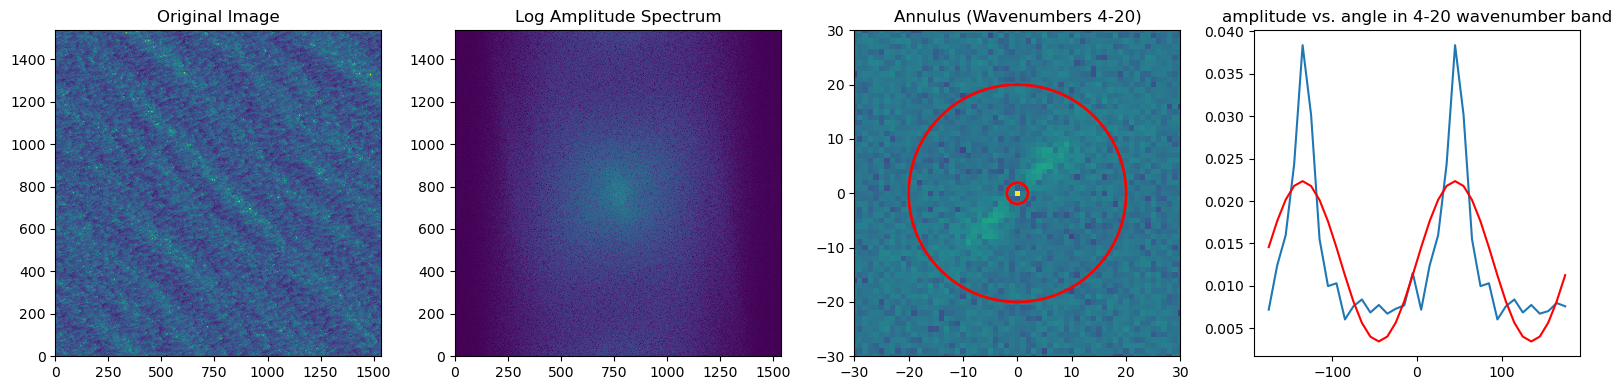

angle is  4 -2.442303546038751 -134.9378126012972 45.062187398702804
strength is  2.9772959441418694


In [183]:
# FFT2 to identify horizontal wavenumber vector 
# ChatGPT wrote this code and I tested/adapted from there 

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from scipy.optimize import curve_fit

# Generate a sample image (replace this with your cloud probability distribution)
image_size = cloud_pattern.shape[0]

# Apply Fourier Transform
fft_result = fft2(cloud_pattern)

# Shift zero frequency components to the center
fft_result_shifted = fftshift(fft_result)

# Calculate amplitude
amplitude = np.abs(fft_result_shifted)


# Create 2D wavenumber array
kx = np.fft.fftshift(np.fft.fftfreq(image_size, d=1/image_size)) 
ky = np.fft.fftshift(np.fft.fftfreq(image_size, d=1/image_size))
kx, ky = np.meshgrid(kx, ky)

# Calculate total wavenumber array
wavenumbers = np.sqrt(kx**2 + ky**2)


# Calculate the polar coordinates
radius = np.sqrt(kx**2 + ky**2)
theta = np.arctan2(ky, kx)

# Average the amplitude where the TOTAL wavenumber is between 4 and 20
min_wavenumber = 2
max_wavenumber = 20
in_k_range = (radius>min_wavenumber) & (radius<max_wavenumber)


# Create theta bins
num_bins = 36  # 10 degrees each bin 
theta_bins = np.linspace(np.min(theta), np.max(theta), num_bins + 1)

# Calculate the mean amplitude in each theta bin
mean_amplitude = np.zeros(num_bins)
for i in range(num_bins):
    in_bin = (theta >= theta_bins[i]) & (theta < theta_bins[i + 1])
    mean_amplitude[i] = np.mean(amplitude * in_k_range * in_bin)


# -------- chatGPT fits it, although really just argmax and max-mean suffices 
# Define the bisinusoidal fit function
def bisinusoidal_fit(theta, amplitude, phase, offset):
    return amplitude * np.sin(2*theta + phase) + offset

# Initial guess for the fit parameters
initial_guess = [1.0, 0.0, 0.0]

# Fit the sinusoidal curve to the azimuthal variation
popt, _ = curve_fit(bisinusoidal_fit, theta_bins[:-1], mean_amplitude, p0=initial_guess)
# ------------


# Plot the original image, amplitude, the annulus, and the fitted sinusoidal curve
plt.figure(figsize=(16, 4))

plt.subplot(141)
plt.pcolormesh(cloud_pattern, cmap='viridis')
plt.title('Original Image')

plt.subplot(142)
plt.pcolormesh(np.log1p(amplitude), cmap='viridis')
plt.title('Log Amplitude Spectrum')

plt.subplot(143)
plt.pcolormesh(kx,ky, np.log1p(amplitude), cmap='viridis')
ax = plt.gca()
ax.set_xlim([-30, 30])
ax.set_ylim([-30, 30])
plt.contour(kx,ky,radius, levels=[min_wavenumber, max_wavenumber], colors='r', linewidths=2)
plt.title('Annulus (Wavenumbers 4-20)')

plt.subplot(144)
plt.plot(theta_bins[:-1] *180/3.1415 + 360/num_bins/2, mean_amplitude)
plt.title('amplitude vs. angle in 4-20 wavenumber band')
plt.plot(theta_bins[:-1] *180/3.1415 + 360/num_bins/2, sinusoidal_fit(2*theta_bins[:-1], *popt), 'r-', label='Sinusoidal Fit')

plt.plot() 

plt.tight_layout()
plt.show()


argmx = np.argmax(mean_amplitude)
maxangle = theta_bins[ argmx ]
maxangledeg = theta_bins[ argmx ] *180/3.1415 + 360/num_bins/2

print('angle is ', argmx, maxangle, maxangledeg, maxangledeg+180)
print('strength is ',np.max(mean_amplitude)/np.mean(mean_amplitude) )

# Print the fitted parameters
#amplitude_fit, phase_fit, offset_fit = popt
#print(f"Amplitude of the Fit: {amplitude_fit}")
#print(f"Phase of the Fit: {phase_fit*1800./3.142}")
#print(f"Offset of the Fit: {offset_fit}")


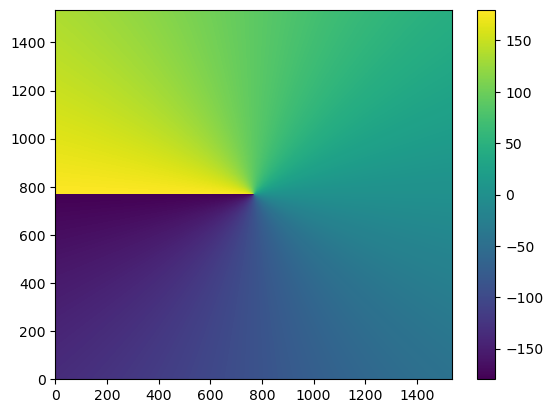

In [149]:
plt.pcolormesh(theta*180./3.1415); plt.colorbar();